In [1]:
DATA_PATH = 'C:/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH +'movie60/'
GRAPH_PATH = 'C:/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
from  skimage.filters import gaussian

In [2]:
gel = np.load(MOVIE_PATH +'np/gel.npy', mmap_mode='r')


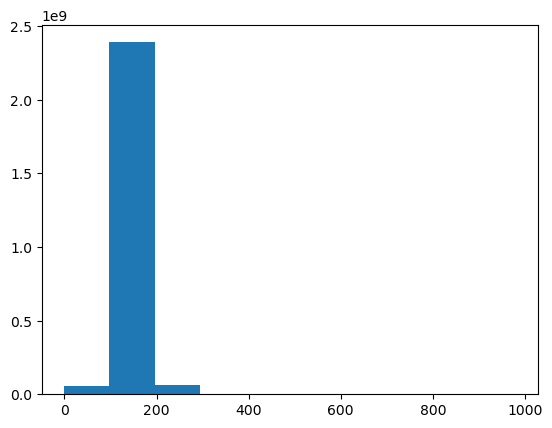

In [2]:
flat = gel.reshape(-1)
plt.hist(flat)
plt.show()

In [3]:
np.min(gel)
np.max(gel)

979.0

In [ ]:
flat = np.array(flat)
flat = np.array([flat[flat<300]])
flat = np.array([flat[flat>100]])
plt.hist(flat)
plt.show()

In [ ]:
flat = gel.reshape(-1).copy()
flat[flat>140] = np.nan
flat[flat<00] = np.nan

plt.figure()
plt.hist(flat[~np.isnan(flat)], bins = 100)
plt.show()

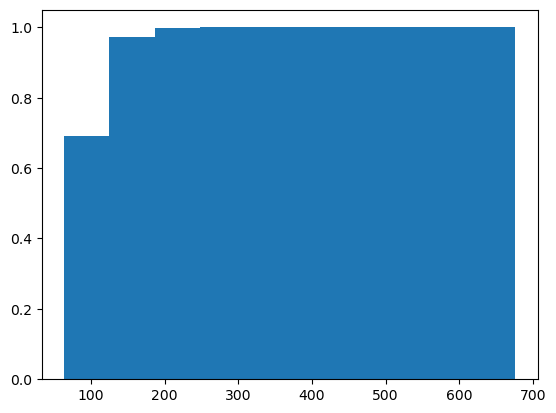

In [3]:
flat = gel[17].reshape(-1)[1:-1:10]
n, bins, patches = plt.hist(flat,cumulative=True, density=True)
plt.show()

In [4]:
min_intensity = bins[1]
max_intensity = 10000

threshold_gel = gaussian(gel[17],3)
threshold_gel[threshold_gel<min_intensity] =0
threshold_gel[threshold_gel>max_intensity] = 0
threshold_gel[np.bitwise_and(threshold_gel>= min_intensity , threshold_gel<= max_intensity)] =1

# np.save(DATA_PATH + 'tmp/t_gel.npy', threshold_gel)



In [11]:
import napari
viewer = napari.Viewer()
image = threshold_gel
viewer.add_image(image)
napari.utils.nbscreenshot(viewer)

KeyboardInterrupt: 

In [36]:
viewer.add_image(threshold_gel)


<Image layer 'threshold_gel' at 0x1b58ad47610>

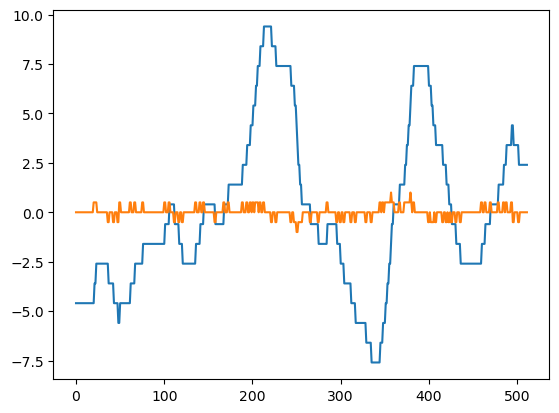

In [6]:
import movie_structure
plane = movie_structure.Vplane(threshold_gel[:,:,256], threshold_gel[:,:,256])
height = plane.set_height()
mean = np.mean(height)
height_difference = height - mean
plt.plot (height_difference)
plt.plot(np.gradient(height))
plt.show()
print()